In [247]:
import pandas as pd
import numpy as np
import datetime

# Problem 1

#### (1)

In [248]:
df = pd.read_csv('/Users/katerina/Documents/РЭШ/Python/Repository/Untitled/metrix2-2023-hw1/NIKKEI225.csv', \
                decimal='.')
df = df.set_index('DATE')
df.index = pd.to_datetime(df.index)

#### (2)

In [249]:
df = pd.to_numeric(df['NIKKEI225'], errors='coerce').dropna().to_frame()
# getting rid of NaNs and converting object to float

#### (3)

### Simple returns 

In [250]:
df['simple_return'] = df['NIKKEI225'].pct_change(1) # computing simple returns 

<AxesSubplot:xlabel='date'>

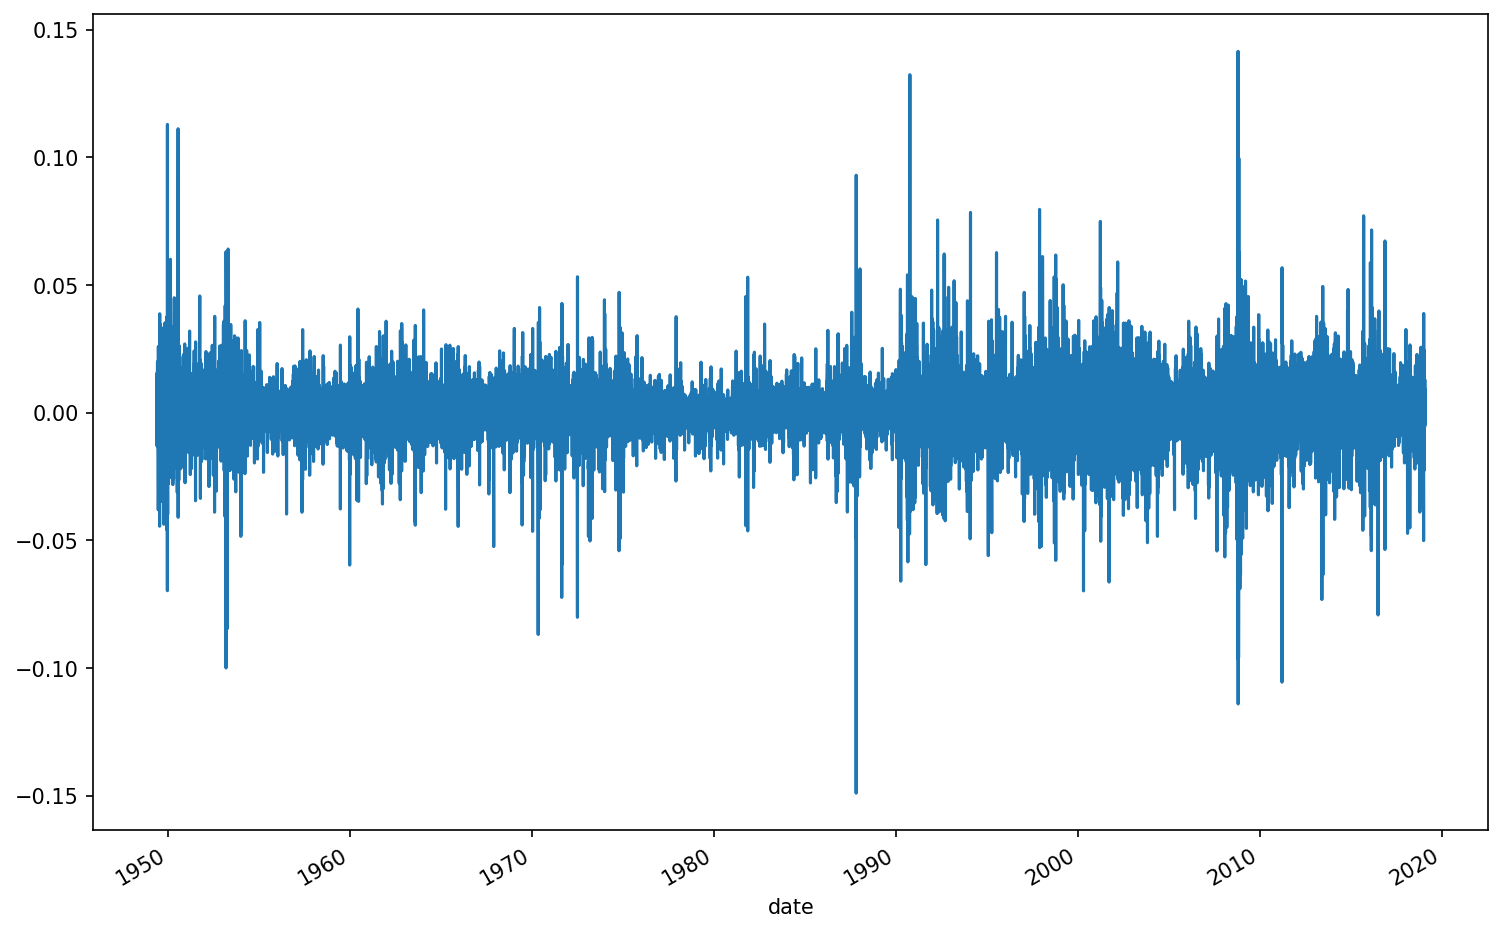

In [251]:
df.simple_return.plot(figsize=(12,8), xlabel='date') # plotting them 

Computing descriptive statistics for simple returns:

In [252]:
mean = df.simple_return.mean()
std = df.simple_return.std()
kurt = df.simple_return.kurtosis()
skew = df.simple_return.skew()

stats = pd.DataFrame(data=[mean, std, kurt, skew], \
                     index=['mean','standard_deviation','kurtosis','skewness'], \
                     columns=['values'])
stats

,values
mean,0.000351
standard_deviation,0.012304
kurtosis,9.494670
skewness,-0.146600


### Logarithmic returns 

In [253]:
df['log_return'] = np.log(df['NIKKEI225']/df['NIKKEI225'].shift(1)) # computing log returns 

<AxesSubplot:xlabel='date'>

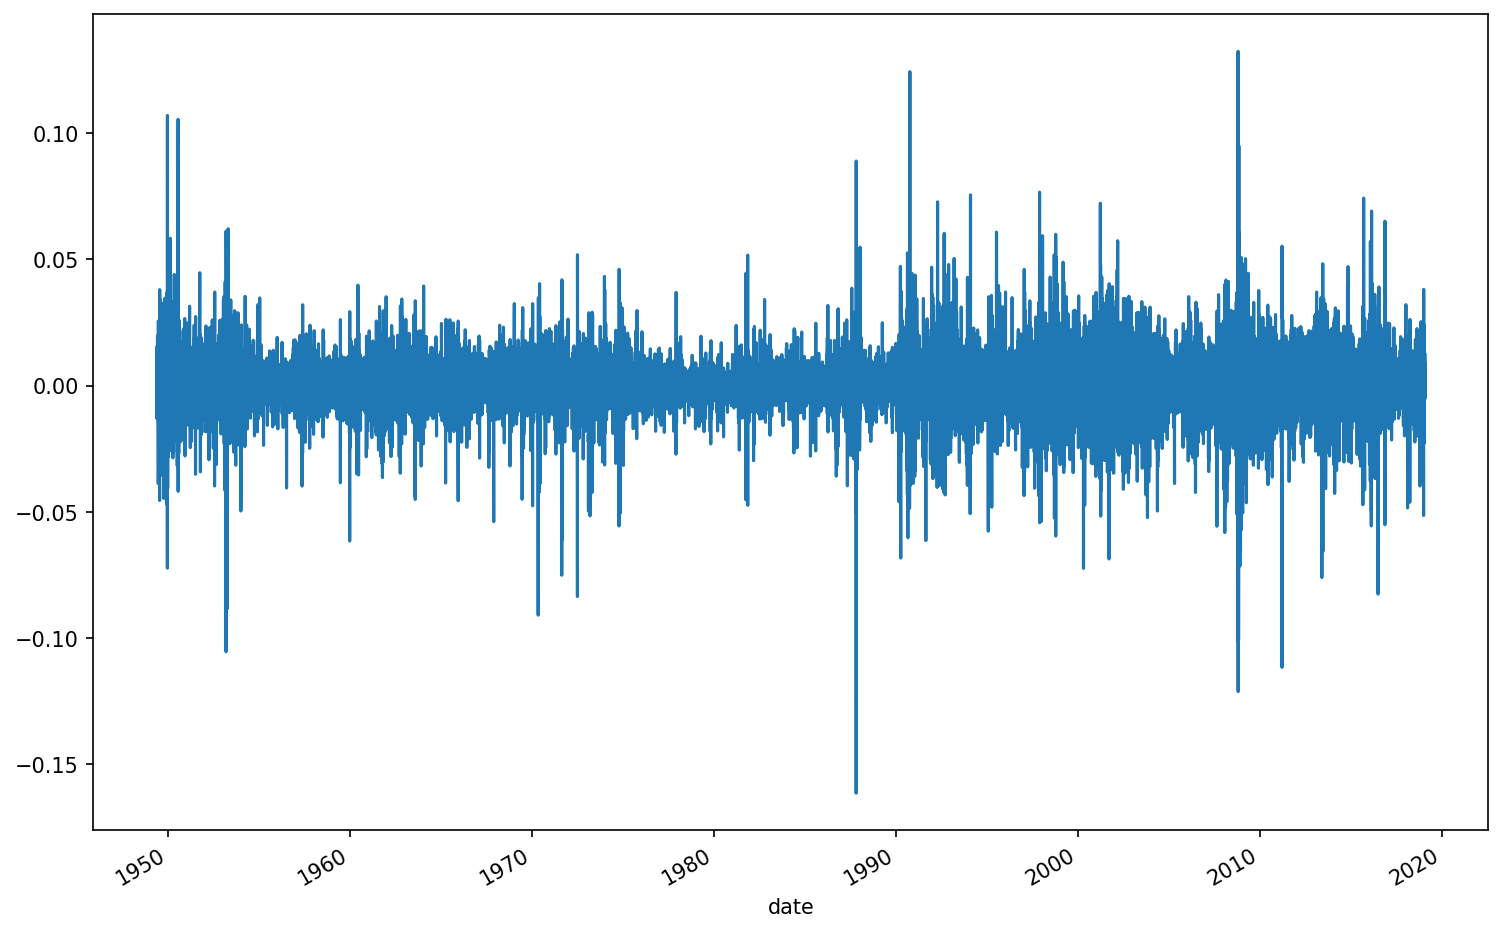

In [254]:
df.log_return.plot(figsize=(12,8), xlabel='date') # plotting them 

Computing descriptive statistics for logarithmic returns:

In [255]:
mean = df.log_return.mean()
std = df.log_return.std()
kurt = df.log_return.kurtosis()
skew = df.log_return.skew()

stats_log = pd.DataFrame(data=[mean, std, kurt, skew], \
                     index=['mean','standard_deviation','kurtosis','skewness'], \
                     columns=['values'])
stats_log

,values
mean,0.000275
standard_deviation,0.012321
kurtosis,9.766192
skewness,-0.359751


Do simple returns and log returns differ?

In [256]:
statistics = stats.join(stats_log, lsuffix='_simple', rsuffix='_log')
statistics

,values_simple,values_log
mean,0.000351,0.000275
standard_deviation,0.012304,0.012321
kurtosis,9.494670,9.766192
skewness,-0.146600,-0.359751


Mean and standard deviation don't differ much. However, simple returns are slightly less skewed to the left, compared to log returns. Besides, simple returns have smaller kurtosis.

#### (4)

### Monthly returns

Preparing data for computing monthly returns:

In [257]:
df['month'] = df.index.to_period('M')

In [258]:
df['simple_return+1'] = df['simple_return'] + 1

In [259]:
group_by = df.groupby('month')

In [260]:
df['month_return'] = group_by['simple_return+1'].transform(np.product) - 1

Monthly returns:

In [261]:
monthly_returns = df.groupby('month')['month_return'].max().to_frame()
monthly_returns

,month_return
month,
1949-05,0.001759
1949-06,-0.167686
1949-07,-0.015859
1949-08,0.211564
1949-09,-0.067873
...,...
2018-09,0.054882
2018-10,-0.091193
2018-11,0.019644


<AxesSubplot:xlabel='date'>

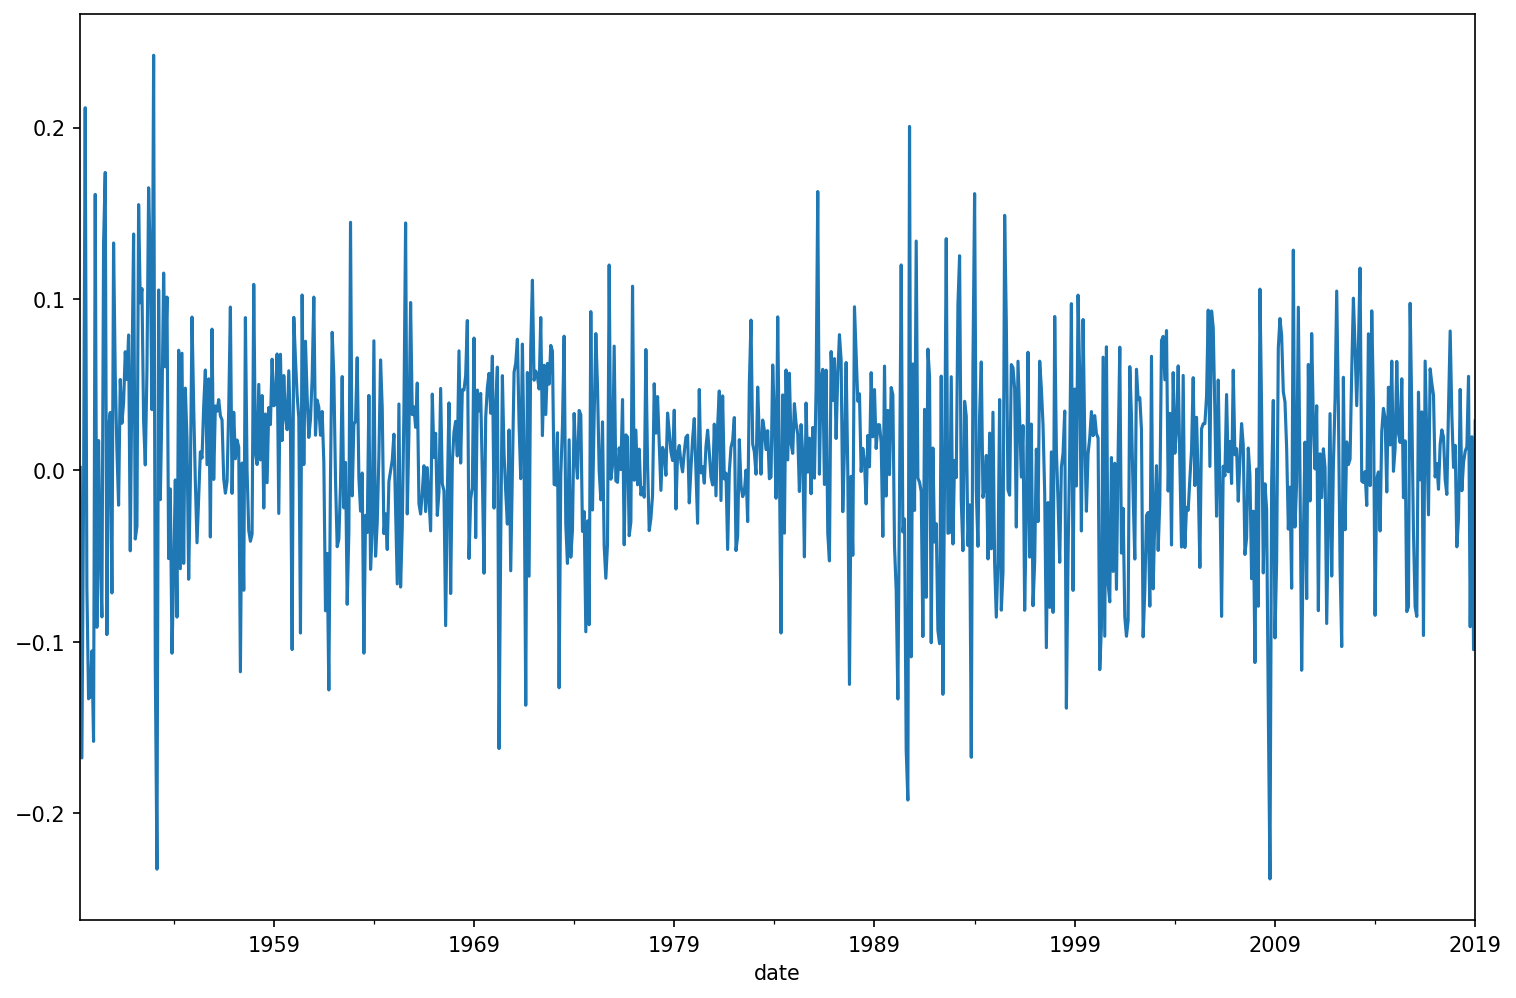

In [262]:
monthly_returns.month_return.plot(figsize=(12,8), xlabel='date')

In [263]:
mean = monthly_returns.month_return.mean()
std = monthly_returns.month_return.std()
kurt = monthly_returns.month_return.kurtosis()
skew = monthly_returns.month_return.skew()

stats_month = pd.DataFrame(data=[mean, std, kurt, skew], \
                     index=['mean','standard_deviation','kurtosis','skewness'], \
                     columns=['values'])
stats_month

,values
mean,0.007395
standard_deviation,0.057940
kurtosis,1.391925
skewness,-0.236213


### Monthly logarithmic returns 

In [264]:
df['log_month_return'] = group_by['log_return'].transform(np.sum)

Monthly log returns: 

In [265]:
log_monthly_returns = df.groupby('month')['log_month_return'].max().to_frame()
log_monthly_returns

,log_month_return
month,
1949-05,0.001758
1949-06,-0.183546
1949-07,-0.015986
1949-08,0.191912
1949-09,-0.070286
...,...
2018-09,0.053429
2018-10,-0.095623
2018-11,0.019453


<AxesSubplot:xlabel='date'>

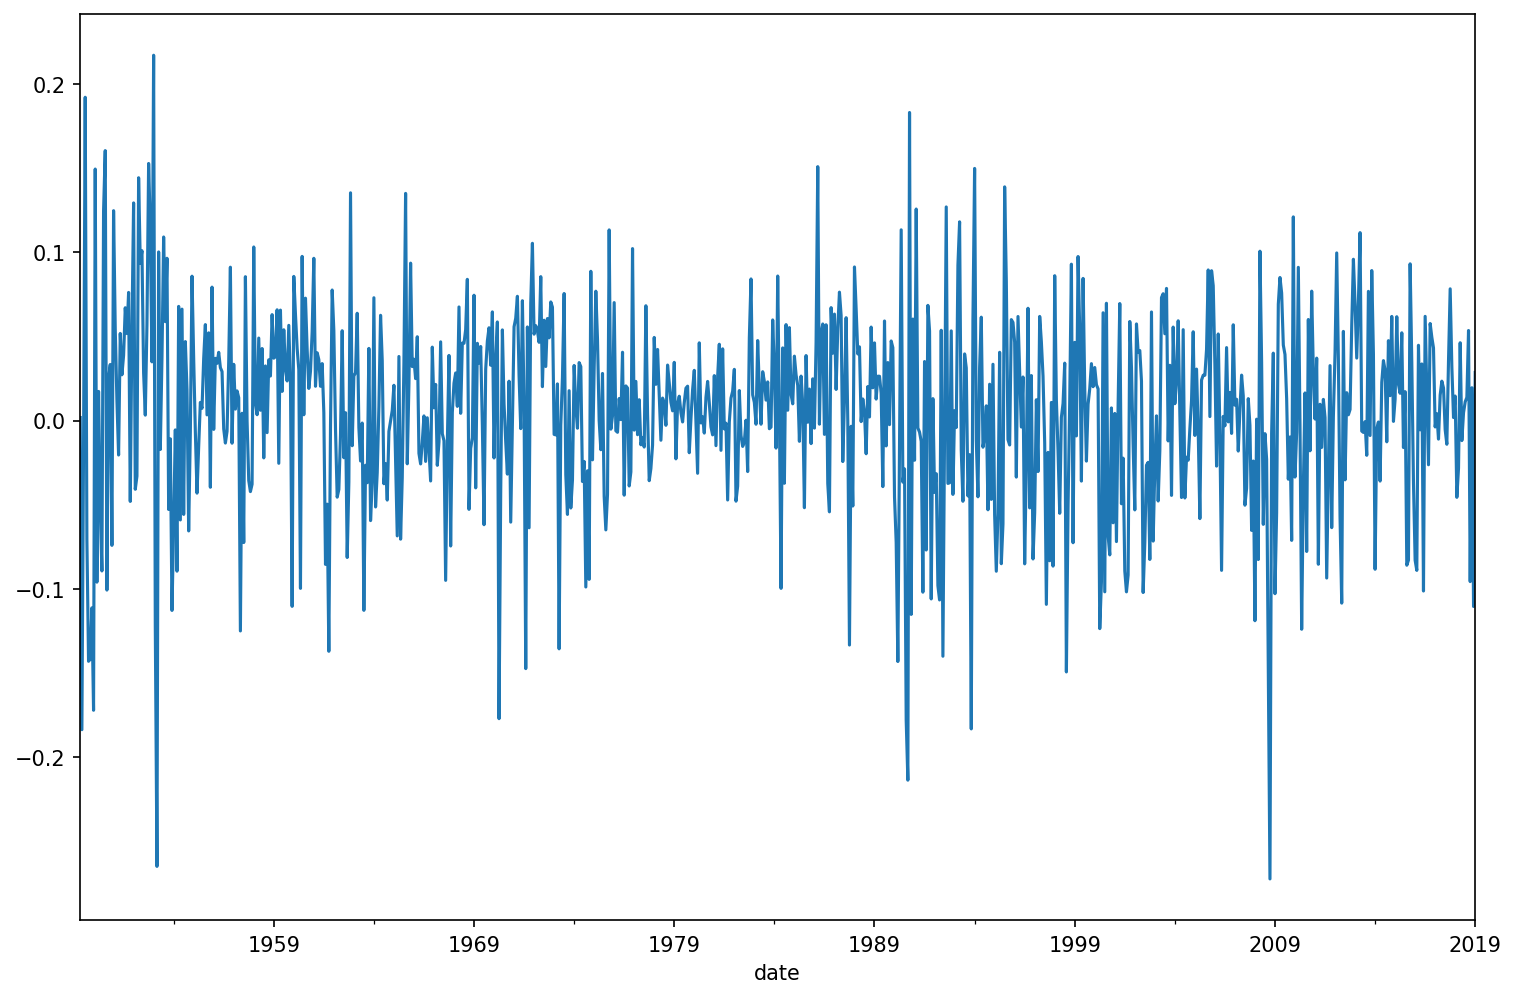

In [266]:
log_monthly_returns.log_month_return.plot(figsize=(12,8), xlabel='date')

In [267]:
mean = log_monthly_returns.log_month_return.mean()
std = log_monthly_returns.log_month_return.std()
kurt = log_monthly_returns.log_month_return.kurtosis()
skew = log_monthly_returns.log_month_return.skew()

stats_log_month = pd.DataFrame(data=[mean, std, kurt, skew], \
                     index=['mean','standard_deviation','kurtosis','skewness'], \
                     columns=['values'])
stats_log_month

,values
mean,0.005688
standard_deviation,0.058278
kurtosis,1.760577
skewness,-0.532118


In [268]:
stats_month.join(stats_log_month,lsuffix='_simple', rsuffix='_log' )

,values_simple,values_log
mean,0.007395,0.005688
standard_deviation,0.057940,0.058278
kurtosis,1.391925,1.760577
skewness,-0.236213,-0.532118


Here we can see a situation similar to daily returns in terms of difference between simple returns and lof returns. That is, mean and standard deviation don't differ much. However, simple returns are slightly less skewed to the left, compared to log returns. Besides, simple returns have smaller kurtosis.

# Problem 2

In [269]:
infl = pd.read_csv('/Users/katerina/Documents/РЭШ/Python/Repository/Untitled/metrix2-2023-hw1/CPIAUCSL.csv')
infl = infl.set_index('DATE')
infl.index = pd.to_datetime(infl.index)
infl.rename(columns={'VALUE':'CPI'}, inplace=True)

Computing monthly log returns: 

In [270]:
infl['log_return'] = np.log(infl['CPI']/infl['CPI'].shift(1)) # monthly log returns 
infl.rename(columns={'log_return':'inflation_rate'}, inplace=True)

Why can we interpret monthly log returns as inflation rate? The thing is, values in the column "CPI" are prices of a basket of goods and services. So, if we compute a change in price between month $t$ and month $t-1$ ($\frac{t}{t-1}-1$), we basically find inflation rate - value by which price in month $t$ changes relative to the price in month $t-1$. As to log returns, logarithmic returns are very close to simple returns in our case, as when returns are not large, log returns and simple returns are pretty close. 

(3)

In [271]:
infl.dropna(inplace=True) # getting rid of Nan's

In [272]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['figure.dpi'] = 150

ACF:

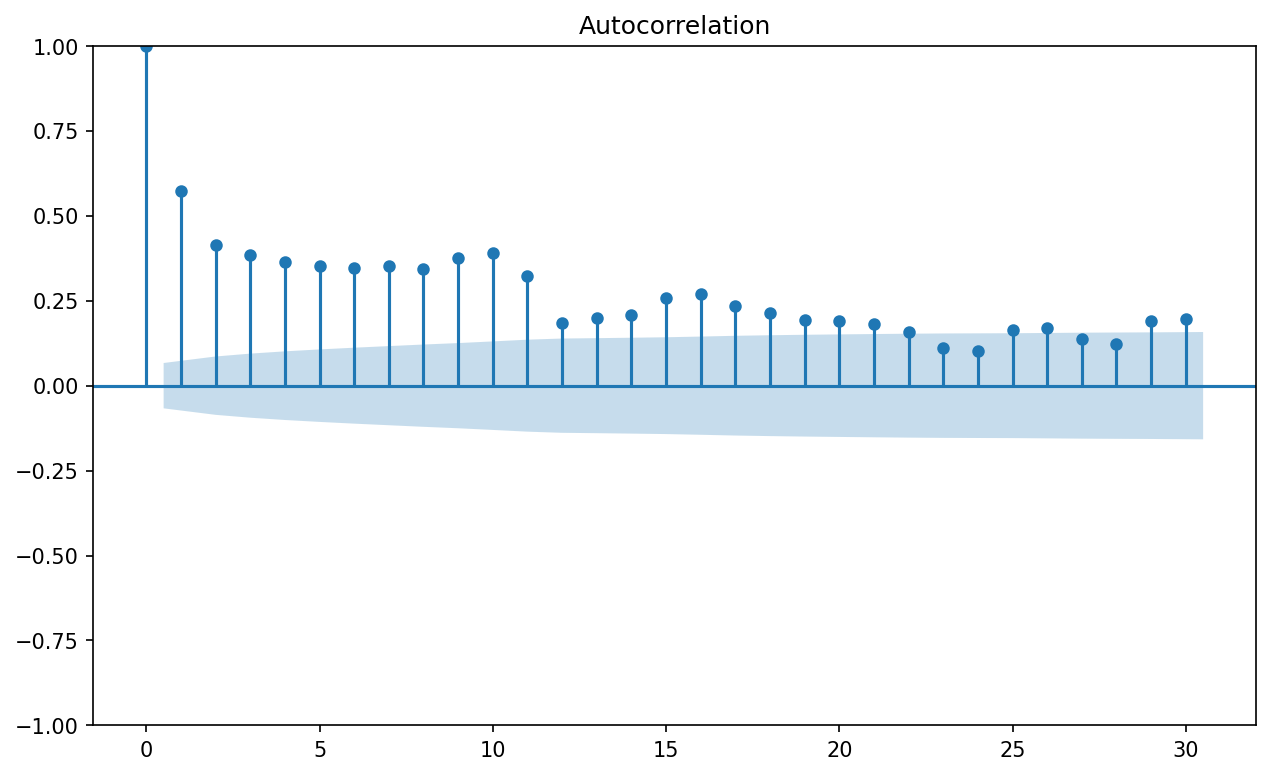

In [273]:
plot_acf(infl['inflation_rate'])
plt.show()

PACF:

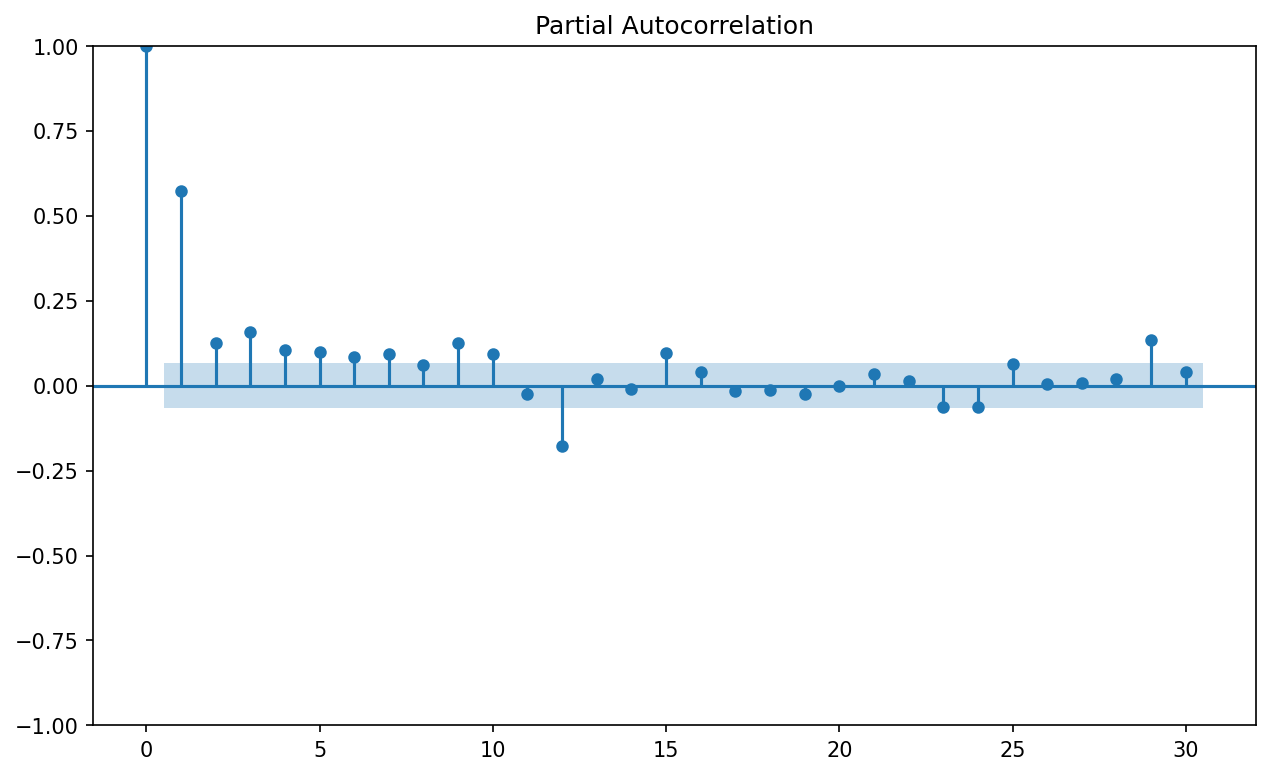

In [274]:
plot_pacf(infl['inflation_rate'], method='ywm')
plt.show()

Ljung-Box statistics (autocorrelation):

In [275]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [276]:
acorr_ljungbox(infl['inflation_rate'], lags=10)

,lb_stat,lb_pvalue
1,284.444874,8.072496e-64
2,432.482031,1.223827e-94
3,560.383971,3.900521e-121
4,675.024832,8.908299e-145
5,783.755458,3.779337e-167
6,888.729102,1.026434e-188
7,996.927988,5.552973e-211
8,1099.431022,5.084193e-232
9,1222.712061,1.514692e-257
10,1355.354604,4.314545e-285


These results of the Ljung-Box test suggest that there's autocorrelation between returns.

ACF and PACF demonstrate that the process is most likely to be ARMA, as the values do not go to zero abruptly neither in ACF nor in PACF.

(4)

In [277]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [278]:
lst = []
for p in range(0, 5) : 
    for q in range(0, 5) : 
        
        aic = ARIMA(infl['inflation_rate'], order = (p, 0, q)).fit().aic
        bic = ARIMA(infl['inflation_rate'], order = (p, 0, q)).fit().bic
        
        aic.astype(float)
        bic.astype(float)
        
        order_p = p
        order_q = q
        
        lst.append([order_p, order_q, aic, bic])
        
data = pd.DataFrame(lst,columns=['order_p', 'order_q', 'aic', 'bic'])         

AIC and BIC for all ARMA models that satisfy $p+q \leq 5$ : 

In [279]:
aic_bic = data[data['order_p'] + data['order_q'] <=5]
aic_bic

,order_p,order_q,aic,bic
0,0,0,-7340.809303,-7331.288474
1,0,1,-7579.913829,-7565.632585
2,0,2,-7626.234016,-7607.192358
3,0,3,-7655.595860,-7631.793786
4,0,4,-7664.459908,-7635.897420
5,1,0,-7683.079741,-7668.798497
6,1,1,-7707.530862,-7688.489203
7,1,2,-7748.945600,-7725.143526
8,1,3,-7748.187557,-7719.625069
9,1,4,-7742.485799,-7709.162896


(5)

The best model in terms of AIC:

In [280]:
aic_bic[aic_bic['aic'] == aic_bic['aic'].min()]

,order_p,order_q,aic,bic
17,3,2,-7749.724449,-7716.401546


The best model in terms of BIC:

In [281]:
aic_bic[aic_bic['bic'] == aic_bic['bic'].min()]

,order_p,order_q,aic,bic
7,1,2,-7748.9456,-7725.143526


(6) Testing residuals of ARMA model to be a white noise. We can test it using Ljung-Box test:

In [282]:
resid_32 = ARIMA(infl['inflation_rate'], order = (3, 0, 2)).fit().resid
res_table_1 = acorr_ljungbox(resid_32)

resid_12 = ARIMA(infl['inflation_rate'], order = (1, 0, 2)).fit().resid
res_table_2 = acorr_ljungbox(resid_12)

res_table_1.join(res_table_2, lsuffix='32_', rsuffix='12_')

,lb_stat32_,lb_pvalue32_,lb_stat12_,lb_pvalue12_
1,0.519580,0.471021,0.684548,0.408025
2,2.718520,0.256851,1.973179,0.372846
3,2.882934,0.410029,3.460514,0.325920
4,2.921616,0.571027,4.860603,0.301902
5,3.144451,0.677727,5.445362,0.363974
6,3.151423,0.789616,5.768287,0.449641
7,3.378672,0.847904,6.099056,0.528232
8,3.498161,0.899332,6.134211,0.632201
9,6.291998,0.710375,11.090079,0.269585
10,19.009446,0.040143,24.640957,0.006069


So, we see that $H_{0}$ is not rejected, meaning that there's no correlation between residuals, which means residuals follow a white noise process.

Let's check by plotting ACF and PACF:

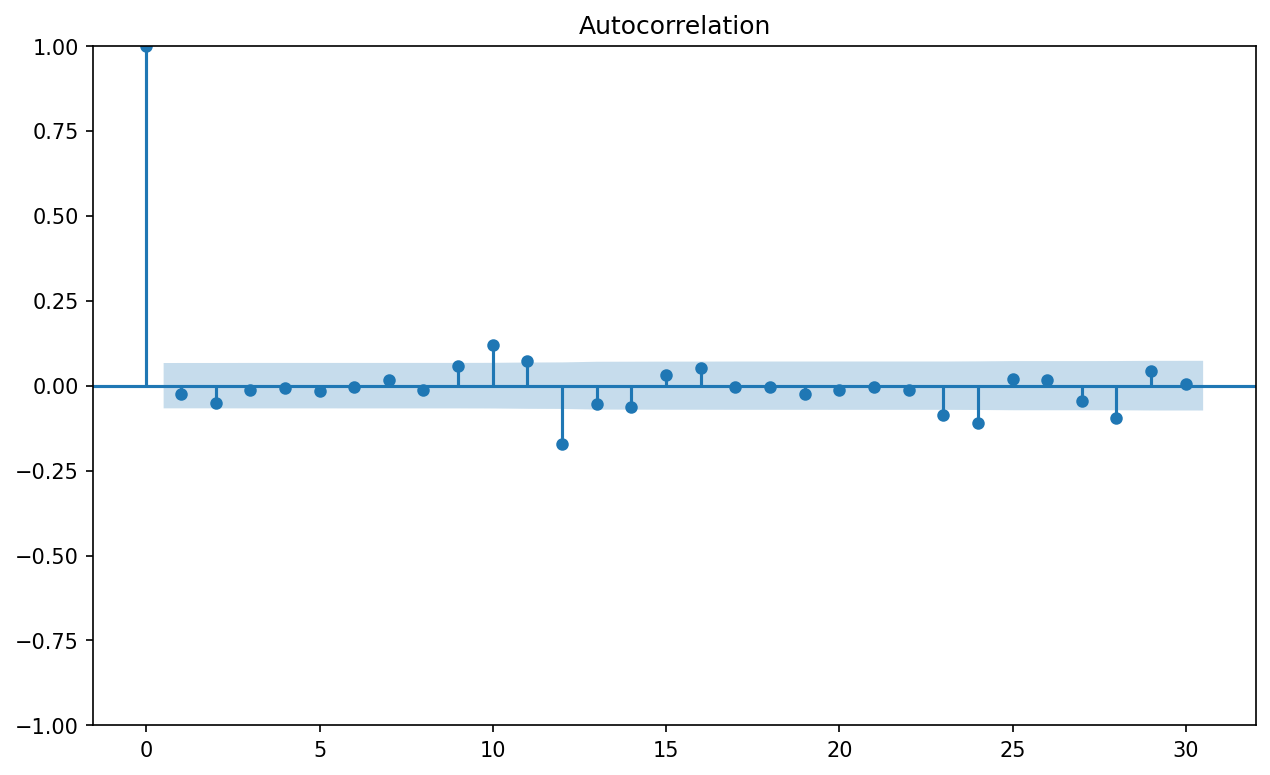

In [326]:
plot_acf(resid_32)
plt.show()

ACF shows similar results: there's no autocorrelation between residuals till the 10th period.

(7)

In [283]:
train = infl[infl.index.year < 2018]
test = infl[infl.index.year >= 2018]

Estimating models using data from the beginning of the data to December 2017:

In [284]:
data_forecast = pd.DataFrame()
for p in range(0, 5) : 
    for q in range(0, 5) :
        if p + q <= 5:
        
            model = ARIMA(train['inflation_rate'], order = (p, 0, q)).fit()
            forecast = model.get_forecast(12)
            forecast_table = forecast.summary_frame().rename(columns={'mean':'inf_forecast'})['inf_forecast']
        
            data_forecast[f"{p}_{q}_infl_fcst"] = forecast_table

(8) Forecasts for each model:

In [286]:
data_forecast 

,0_0_infl_fcst,0_1_infl_fcst,0_2_infl_fcst,0_3_infl_fcst,0_4_infl_fcst,1_0_infl_fcst,1_1_infl_fcst,1_2_infl_fcst,1_3_infl_fcst,1_4_infl_fcst,2_0_infl_fcst,2_1_infl_fcst,2_2_infl_fcst,2_3_infl_fcst,3_0_infl_fcst,3_1_infl_fcst,3_2_infl_fcst,4_0_infl_fcst,4_1_infl_fcst
2018-01-01,0.002869,0.002036,0.002916,0.002200,0.002361,0.002380,0.002456,0.002191,0.002007,0.001905,0.002511,0.002562,0.002184,0.002141,0.002151,0.002068,0.002079,0.002459,0.002371
2018-02-01,0.002869,0.002871,0.002659,0.002875,0.002261,0.002591,0.002556,0.002398,0.002001,0.001855,0.002583,0.002671,0.002379,0.002166,0.002550,0.002597,0.002141,0.002467,0.002452
2018-03-01,0.002869,0.002871,0.002873,0.002714,0.002904,0.002711,0.002632,0.002429,0.002046,0.001866,0.002683,0.002763,0.002413,0.002320,0.002549,0.002522,0.002144,0.002622,0.002622
2018-04-01,0.002869,0.002871,0.002873,0.002874,0.002647,0.002781,0.002690,0.002457,0.002056,0.001876,0.002742,0.002829,0.002441,0.002263,0.002588,0.002587,0.002181,0.002604,0.002590
2018-05-01,0.002869,0.002871,0.002873,0.002874,0.002874,0.002820,0.002734,0.002484,0.002065,0.001882,0.002784,0.002876,0.002467,0.002329,0.002668,0.002689,0.002182,0.002650,0.002653
2018-06-01,0.002869,0.002871,0.002873,0.002874,0.002874,0.002843,0.002767,0.002509,0.002074,0.001887,0.002813,0.002910,0.002492,0.002321,0.002710,0.002715,0.002212,0.002687,0.002695
2018-07-01,0.002869,0.002871,0.002873,0.002874,0.002874,0.002856,0.002793,0.002533,0.002084,0.001893,0.002832,0.002935,0.002515,0.002356,0.002740,0.002749,0.002214,0.002721,0.002730
2018-08-01,0.002869,0.002871,0.002873,0.002874,0.002874,0.002864,0.002813,0.002554,0.002093,0.001898,0.002846,0.002952,0.002537,0.002364,0.002769,0.002782,0.002241,0.002742,0.002751
2018-09-01,0.002869,0.002871,0.002873,0.002874,0.002874,0.002868,0.002827,0.002575,0.002102,0.001904,0.002855,0.002965,0.002557,0.002387,0.002791,0.002801,0.002245,0.002762,0.002773
2018-10-01,0.002869,0.002871,0.002873,0.002874,0.002874,0.002871,0.002839,0.002594,0.002111,0.001909,0.002861,0.002974,0.002576,0.002401,0.002808,0.002817,0.002269,0.002780,0.002792


(9) Comparing the forecasting accuracy

Joining real inflation rate with the forecasted ones: 

In [295]:
comparing = test[['inflation_rate']].join(data_forecast)

In [299]:
comparing

,inflation_rate,0_0_infl_fcst,0_1_infl_fcst,0_2_infl_fcst,0_3_infl_fcst,0_4_infl_fcst,1_0_infl_fcst,1_1_infl_fcst,1_2_infl_fcst,1_3_infl_fcst,1_4_infl_fcst,2_0_infl_fcst,2_1_infl_fcst,2_2_infl_fcst,2_3_infl_fcst,3_0_infl_fcst,3_1_infl_fcst,3_2_infl_fcst,4_0_infl_fcst,4_1_infl_fcst
DATE,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.005371,0.002869,0.002036,0.002916,0.002200,0.002361,0.002380,0.002456,0.002191,0.002007,0.001905,0.002511,0.002562,0.002184,0.002141,0.002151,0.002068,0.002079,0.002459,0.002371
2018-02-01,0.001499,0.002869,0.002871,0.002659,0.002875,0.002261,0.002591,0.002556,0.002398,0.002001,0.001855,0.002583,0.002671,0.002379,0.002166,0.002550,0.002597,0.002141,0.002467,0.002452
2018-03-01,-0.000629,0.002869,0.002871,0.002873,0.002714,0.002904,0.002711,0.002632,0.002429,0.002046,0.001866,0.002683,0.002763,0.002413,0.002320,0.002549,0.002522,0.002144,0.002622,0.002622
2018-04-01,0.002206,0.002869,0.002871,0.002873,0.002874,0.002647,0.002781,0.002690,0.002457,0.002056,0.001876,0.002742,0.002829,0.002441,0.002263,0.002588,0.002587,0.002181,0.002604,0.002590
2018-05-01,0.002086,0.002869,0.002871,0.002873,0.002874,0.002874,0.002820,0.002734,0.002484,0.002065,0.001882,0.002784,0.002876,0.002467,0.002329,0.002668,0.002689,0.002182,0.002650,0.002653
2018-06-01,0.001284,0.002869,0.002871,0.002873,0.002874,0.002874,0.002843,0.002767,0.002509,0.002074,0.001887,0.002813,0.002910,0.002492,0.002321,0.002710,0.002715,0.002212,0.002687,0.002695
2018-07-01,0.001709,0.002869,0.002871,0.002873,0.002874,0.002874,0.002856,0.002793,0.002533,0.002084,0.001893,0.002832,0.002935,0.002515,0.002356,0.002740,0.002749,0.002214,0.002721,0.002730
2018-08-01,0.002226,0.002869,0.002871,0.002873,0.002874,0.002874,0.002864,0.002813,0.002554,0.002093,0.001898,0.002846,0.002952,0.002537,0.002364,0.002769,0.002782,0.002241,0.002742,0.002751
2018-09-01,0.000587,0.002869,0.002871,0.002873,0.002874,0.002874,0.002868,0.002827,0.002575,0.002102,0.001904,0.002855,0.002965,0.002557,0.002387,0.002791,0.002801,0.002245,0.002762,0.002773


Computing MSE:

In [306]:
def mse(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()

lst = []
for p in range(0, 5) : 
    for q in range(0, 5) :
        if p + q <= 5:
            mse_res = mse(comparing['inflation_rate'], comparing[f"{p}_{q}_infl_fcst"])
            order_p = p
            order_q = q
            lst.append([order_p, order_q, mse_res])
            
mse = pd.DataFrame(lst,columns=['order_p', 'order_q', 'mse'])

Model with the most accurate predictions judging by MSE:

In [308]:
mse[mse['mse'] == mse['mse'].min()] # model p=1, q=4

,order_p,order_q,mse
9,1,4,0.000003


Computing MAE:

In [314]:
def mae(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    return np.mean(np.abs(actual - predicted))

lst = []
for p in range(0, 5) : 
    for q in range(0, 5) :
        if p + q <= 5:
            mae_res = mae(comparing['inflation_rate'], comparing[f"{p}_{q}_infl_fcst"])
            order_p = p
            order_q = q
            lst.append([order_p, order_q, mae_res])
            
mae = pd.DataFrame(lst,columns=['order_p', 'order_q', 'mae'])

Model with the most accurate predictions judging by MAE:

In [317]:
mae[mae['mae'] == mae['mae'].min()] # model p=1, q=4

,order_p,order_q,mae
9,1,4,0.00124


Some other reasonable accuracy measure - RMSE: 

In [322]:
def mse(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return np.sqrt(squared_differences.mean())

lst = []
for p in range(0, 5) : 
    for q in range(0, 5) :
        if p + q <= 5:
            rmse_res = mse(comparing['inflation_rate'], comparing[f"{p}_{q}_infl_fcst"])
            order_p = p
            order_q = q
            lst.append([order_p, order_q, rmse_res])
            
rmse = pd.DataFrame(lst,columns=['order_p', 'order_q', 'rmse'])

Model with the most accurate predictions judging by RMSE:

In [323]:
rmse[rmse['rmse'] == rmse['rmse'].min()] # model p=1, q=4

,order_p,order_q,rmse
9,1,4,0.001629


Model with p=1, q=4 has the best forecasting accuracy. Interestingly enough, it's not the model with the best BIC or AIC.